Let's analyze the distinguishing factors between phishing and legitimate emails using the the following dataset:

https://www.kaggle.com/datasets/naserabdullahalam/phishing-email-dataset


# Loading dataset

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!kaggle datasets download -d naserabdullahalam/phishing-email-dataset

Dataset URL: https://www.kaggle.com/datasets/naserabdullahalam/phishing-email-dataset
License(s): CC-BY-SA-4.0
phishing-email-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip phishing-email-dataset.zip -d phishing-email-dataset

Archive:  phishing-email-dataset.zip
replace phishing-email-dataset/CEAS_08.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: phishing-email-dataset/CEAS_08.csv  
replace phishing-email-dataset/Enron.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: phishing-email-dataset/Enron.csv  
  inflating: phishing-email-dataset/Ling.csv  
  inflating: phishing-email-dataset/Nazario.csv  
  inflating: phishing-email-dataset/Nigerian_Fraud.csv  
  inflating: phishing-email-dataset/SpamAssasin.csv  
  inflating: phishing-email-dataset/phishing_email.csv  


In [ ]:
import pandas as pd

df_SpamAssasin = pd.read_csv('phishing-email-dataset/SpamAssasin.csv')
df_Nigerian_Fraud = pd.read_csv('phishing-email-dataset/Nigerian_Fraud.csv')
df_phishing_email = pd.read_csv('phishing-email-dataset/phishing_email.csv')
df_CEAS_08 = pd.read_csv('phishing-email-dataset/CEAS_08.csv')
df_Enron = pd.read_csv('phishing-email-dataset/Enron.csv')
df_Ling = pd.read_csv('phishing-email-dataset/Ling.csv')
df_Nazario = pd.read_csv('phishing-email-dataset/Nazario.csv')

# Get basic information about the datasets
df_SpamAssasin.info()
df_Nigerian_Fraud.info()
df_phishing_email.info()
df_CEAS_08.info()
df_Enron.info()
df_Ling.info()
df_Nazario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5809 entries, 0 to 5808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    5809 non-null   object
 1   receiver  5599 non-null   object
 2   date      5809 non-null   object
 3   subject   5793 non-null   object
 4   body      5808 non-null   object
 5   label     5809 non-null   int64 
 6   urls      5809 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 317.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3332 entries, 0 to 3331
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    3001 non-null   object
 1   receiver  2008 non-null   object
 2   date      2850 non-null   object
 3   subject   3293 non-null   object
 4   body      3332 non-null   object
 5   urls      3332 non-null   int64 
 6   label     3332 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 182.3+ KB


# Dataset exploration

In [ ]:
df_SpamAssasin.head()

,sender,receiver,date,subject,body,label,urls
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,1
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,1
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,1
3,Monty Solomon <monty@roscom.com>,undisclosed-recipient: ;,"Thu, 22 Aug 2002 09:15:25 -0400",[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,1
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,zzzzteana@yahoogroups.com,"Thu, 22 Aug 2002 14:38:22 +0100",Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,1


In [ ]:

df_phishing_email.head()

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


In [ ]:
df_Nigerian_Fraud.head()


,sender,receiver,date,subject,body,urls,label
0,MR. JAMES NGOLA. <james_ngola2002@maktoob.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 02:38:20 +0000",URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...,0,1
1,Mr. Ben Suleman <bensul2004nng@spinfinder.com>,R@M,"Thu, 31 Oct 2002 05:10:00 -0000",URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",0,1
2,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:17:55 +0100",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,0,1
3,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:44:20 -0000",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,0,1
4,Maryam Abacha <m_abacha03@www.com>,R@M,"Fri, 01 Nov 2002 01:45:04 +0100",I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope...",0,1


In [ ]:
df_CEAS_08.head()

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


In [ ]:
df_Enron.head()

,subject,body,label
0,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls )\r\n- h...,0
1,re : nom / actual vols for 24 th,- - - - - - - - - - - - - - - - - - - - - - fo...,0
2,"enron actuals for march 30 - april 1 , 201","estimated actuals\r\nmarch 30 , 2001\r\nno flo...",0
3,"hpl nom for may 30 , 2001",( see attached file : hplno 530 . xls )\r\n- h...,0
4,"hpl nom for june 1 , 2001",( see attached file : hplno 601 . xls )\r\n- h...,0


In [ ]:
df_Nazario.head()

,sender,receiver,date,subject,body,urls,label
0,Mail System Internal Data <MAILER-DAEMON@monke...,NaN,28 Sep 2017 09:57:25 -0400,DON'T DELETE THIS MESSAGE -- FOLDER INTERNAL DATA,This text is part of the internal format of yo...,1,1
1,cPanel <service@cpanel.com>,jose@monkey.org,"Fri, 30 Oct 2015 00:00:48 -0500",Verify Your Account,Business with \t\t\t\t\t\t\t\tcPanel & WHM \t...,1,1
2,Microsoft Outlook <recepcao@unimedceara.com.br>,NaN,"Fri, 30 Oct 2015 06:21:59 -0300 (BRT)",Helpdesk Mailbox Alert!!!,Your two incoming mails were placed on pending...,1,1
3,Ann Garcia <AnGarcia@mcoe.org>,"""info@maaaaa.org"" <info@maaaaa.org>","Fri, 30 Oct 2015 14:54:33 +0000",IT-Service Help Desk,Password will expire in 3 days. Click Here To ...,0,1
4,"""USAA"" <usaaacctupdate@sccu4u.com>",Recipients <usaaacctupdate@sccu4u.com>,"Fri, 30 Oct 2015 14:02:33 -0500",Final USAA Reminder - Update Your Account Now,"To ensure delivery to your inbox, please add U...",1,1


In [ ]:
df_Ling.head()

,subject,body,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


As we can see, it seems that column "label" contains values 0 (Non-Spam) and 1(Spam)


#  Number of emails

We can now check the number of emails in each category


In [ ]:
import pandas as pd

# List of dataset paths
file_paths = {
    'SpamAssasin': 'phishing-email-dataset/SpamAssasin.csv',
    'Nigerian_Fraud': 'phishing-email-dataset/Nigerian_Fraud.csv',
    'Phishing_Email': 'phishing-email-dataset/phishing_email.csv',
    'CEAS_08': 'phishing-email-dataset/CEAS_08.csv',
    'Enron': 'phishing-email-dataset/Enron.csv',
    'Ling': 'phishing-email-dataset/Ling.csv',
    'Nazario': 'phishing-email-dataset/Nazario.csv'
}

# Dictionary to store spam and non-spam counts
spam_nonspam_counts = {}

# Iterate over each dataset
for name, path in file_paths.items():
    try:
        # Load dataset
        df = pd.read_csv(path)

        # Check if 'label' column exists
        if 'label' in df.columns:
            # Count the number of spam and non-spam emails
            spam_count = df[df['label'] == 1].shape[0]
            non_spam_count = df[df['label'] == 0].shape[0]
        else:
            # If 'label' column does not exist, consider all emails as spam
            spam_count = df.shape[0]
            non_spam_count = 0

        # Store the counts in the dictionary
        spam_nonspam_counts[name] = {
            'spam_count': spam_count,
            'non_spam_count': non_spam_count
        }

    except FileNotFoundError:
        print(f"File not found: {path}")

# Display the counts
for dataset, counts in spam_nonspam_counts.items():
    print(f"{dataset}: {counts['spam_count']} spam emails, {counts['non_spam_count']} non-spam email")

SpamAssasin: 1718 spam emails, 4091 non-spam email
Nigerian_Fraud: 3332 spam emails, 0 non-spam email
Phishing_Email: 42891 spam emails, 39595 non-spam email
CEAS_08: 21842 spam emails, 17312 non-spam email
Enron: 13976 spam emails, 15791 non-spam email
Ling: 458 spam emails, 2401 non-spam email
Nazario: 1565 spam emails, 0 non-spam email


# Text preprocessing

In [57]:

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 Text preprocessing ensures uniformity and enhances email analysis by converting input to lowercase for case insensitivity, removing punctuation to focus on meaningful content, and eliminating stop words to reduce noise.

In [58]:
# Initialize lists to store spam and non-spam email bodies
spam_emails = []
non_spam_emails = []

# Function to preprocess text
def preprocess_text(text):
    if not isinstance(text, str):
        text = ''
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


In [59]:
 # Iterate through each dataset
for name, path in file_paths.items():
    try:
        # Load the dataset
        df = pd.read_csv(path)

        # Determine the appropriate column for text data
        text_column = 'body'
        if name == 'Phishing_Email':
            text_column = 'text_combined'

        # Check if 'label' column exists
        if 'label' in df.columns:
            spam_emails += df[df['label'] == 1][text_column].tolist()
            non_spam_emails += df[df['label'] == 0][text_column].tolist()
        else:
            spam_emails += df[text_column].tolist()

    except FileNotFoundError:
        print(f"File not found: {path}")


In [60]:
# Preprocess emails
spam_emails = [preprocess_text(email) for email in spam_emails]
non_spam_emails = [preprocess_text(email) for email in non_spam_emails]

# Join all spam and non-spam emails into single strings
spam_text = ' '.join(spam_emails)
non_spam_text = ' '.join(non_spam_emails)

# Word clouds

 Word clouds are graphical representations where the size of each word indicates its frequency or importance within the text. By generating separate word clouds for spam and non-spam emails, we can visually compare and contrast the most frequent words used in each category.

In [ ]:
# Generate word clouds
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
non_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_spam_text)


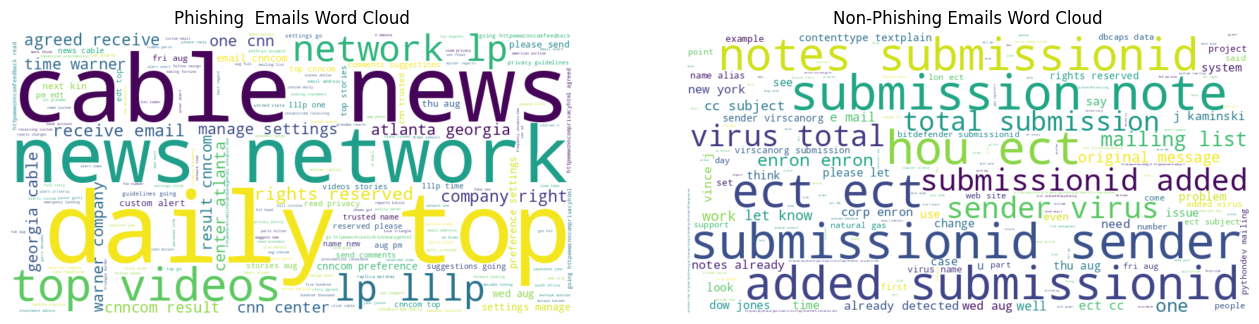

In [ ]:
import matplotlib.pyplot as plt

# Plot word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Phishing  Emails Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.title('Non-Phishing Emails Word Cloud')
plt.axis('off')

plt.show()

#  top 10 frequent on words in phishing and non-phishing emails

Let's check the top 10 frequent on words in phishing and non-phishing emails




In [61]:
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
from collections import Counter

# Define the preprocessing function
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return words

# Function to get top 10 frequent words in non-spam emails
def top_non_spam_words(df, text_column):
    # Fill NaN values in text_column with empty strings
    df[text_column] = df[text_column].fillna('')
    # Apply preprocessing
    df['processed_body'] = df[text_column].apply(preprocess)
    # Separate non-spam emails
    non_spam_words = df[df['label'] == 0]['processed_body'].sum()
    # Count word frequencies
    non_spam_word_counts = Counter(non_spam_words)
    # Get the most common words
    top_non_spam_words = non_spam_word_counts.most_common(10)
    return top_non_spam_words

# Function to get top 10 frequent words in spam emails
def top_spam_words(df, text_column):
    # Fill NaN values in text_column with empty strings
    df[text_column] = df[text_column].fillna('')
    # Apply preprocessing
    df['processed_body'] = df[text_column].apply(preprocess)
    # Separate spam emails
    spam_words = df[df['label'] == 1]['processed_body'].sum()
    # Count word frequencies
    spam_word_counts = Counter(spam_words)
    # Get the most common words
    top_spam_words = spam_word_counts.most_common(10)
    return top_spam_words

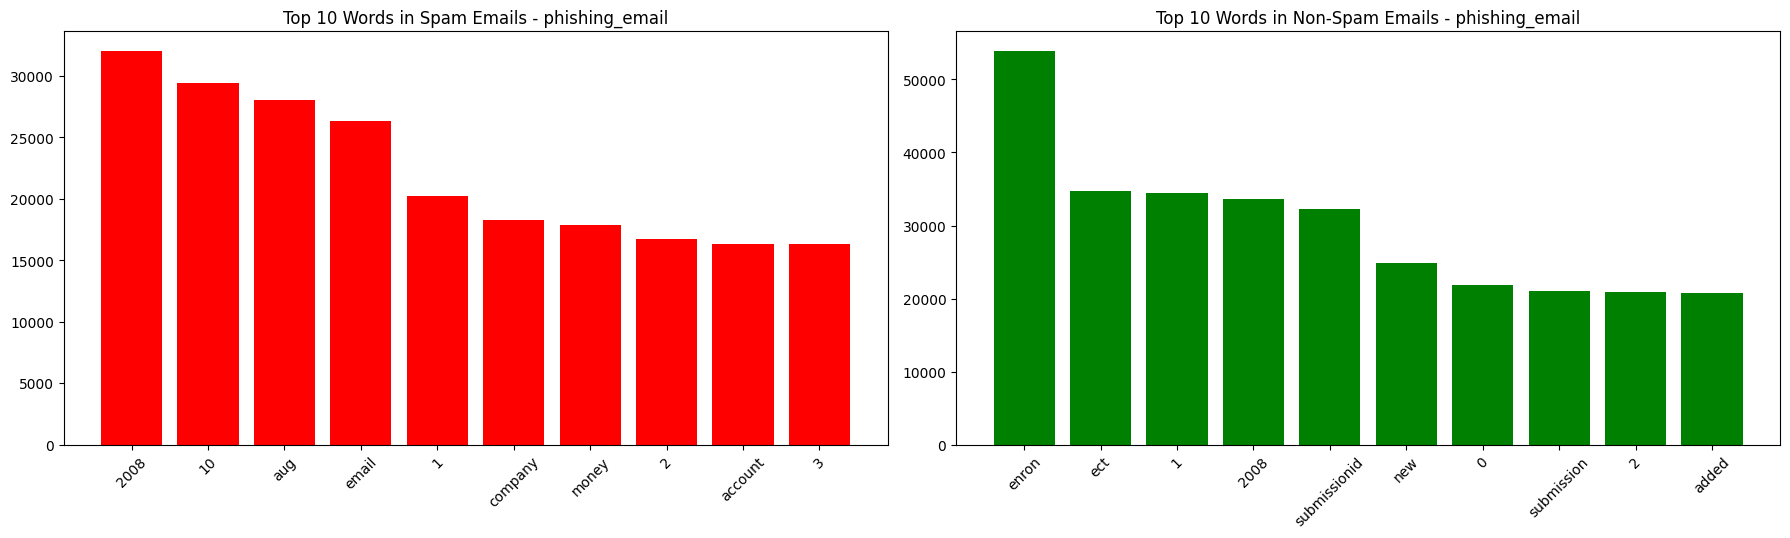

In [62]:

dfs = [('phishing_email', df_phishing_email, 'text_combined')]
plt.figure(figsize=(18, 20))

for i, (name, df, text_column) in enumerate(dfs):
    # Get top words for spam and non-spam
    top_spam = top_spam_words(df, text_column)
    top_non_spam = top_non_spam_words(df, text_column)

    # Plot top spam words
    words_spam, frequencies_spam = zip(*top_spam)
    plt.subplot(4, 2, 2*i+1)
    plt.bar(words_spam, frequencies_spam, color='red')
    plt.title(f'Top 10 Words in Spam Emails - {name}')
    plt.xticks(rotation=45)

    # Plot top non-spam words
    words_non_spam, frequencies_non_spam = zip(*top_non_spam)
    plt.subplot(4, 2, 2*i+2)
    plt.bar(words_non_spam, frequencies_non_spam, color='green')
    plt.title(f'Top 10 Words in Non-Spam Emails - {name}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Top 10 Words in Phishing email(commented)


**2008**: Specific years may be used to reference past events or to give a sense of urgency or legitimacy. For example, "Since 2008, we have been keeping an account for you..." This could also be a tactic to make the scam seem long-standing or to reference a particular event or policy change from that year.

**10**: Numbers like "10" can be used to create lists or to imply rankings, which can make the email seem more official or to suggest a limited offer, as in "Top 10 account holders."

**Aug**: Months are often used to timestamp the urgency, such as "Your account will be closed by Aug 20th if not verified."

**Email**: The word "email" is used to refer to the communication itself or to request that the recipient respond via email, which is the medium of the phishing attempt.

**1**: Similar to "10," the number "1" can be used to suggest priority or urgency, as in "You are our number 1 choice," or to create a sense of exclusivity.

**Company**: This word is used to impersonate a legitimate company or to create a sense of official communication from a business entity.

**Money**: Phishing emails often lure recipients with promises of money, whether it's a prize, inheritance, found money, or a warning about money that needs to be secured.

**2**: Again, numbers are used for lists, steps, or to create a sense of sequence and urgency.

**Account**: Phishing attempts frequently involve tricking the recipient into providing account information or to make them believe there is an issue with their account that needs immediate attention.

**3**: This is another number that could be used in a sequence or list, or to suggest a ranking or step in a process.

# Top 10 Words in Non-Phishing email(commented)

**Enron**: This is specific to the company itself. In the Enron Corpus, or in any business-related communication from that company, "Enron" would naturally be a frequently used term.

**Etch**: In legitimate business correspondence, "etc." is simply a part of normal, everyday language.

**1**: Numbers are often used in business communication for lists, points, or to denote priority or sequence.

**2008**: If the emails are from around that year, "2008" could be common as it would be relevant to the date of transactions, events, or fiscal reporting.

**SubmissionID**: This might be a term used in the context of internal processes, where documents, proposals, or reports have a unique "SubmissionID" for tracking and reference purposes.

**New**: In a corporate setting, "new" could refer to new products, services, initiatives, or changes within the company.

**0**: The number zero might be used in data, reports, or to signify the absence of something, such as "0 errors" or "0 delays."

**Submission**: Similar to "SubmissionID," this term would be common in any environment where reports, documents, or proposals are regularly submitted for review.

**2**: As with other numbers, "2" could be part of a list, denote a version (as in "Version 2"), or be used in financial or data reporting.

**Added**: This term could be used in various contexts, such as "added features," "added to the team," or "added to the agenda."

We'll assess if the presence of "money," "account," and "company" significantly influences phishing email categorization, prioritizing word analysis over numerical data for now.


* The words "company," "money," and "account" are semantically meaningful terms that are likely to occur in the context of email communication, especially in business-related emails. They convey information about financial transactions, business dealings, and corporate entities, which are common topics in both spam and non-spam emails.

* In contrast, numerical digits such as "2008," "10," and "3" may not carry significant semantic meaning on their own within the context of email content. They could represent various dates, quantities, or other numeric identifiers that may not directly relate to the content of the email



# Contigency table

I'm going to use  a contingency table and perform a Chi-square test to investigate the association between the presence of specific words in email texts and their classification as spam or non-spam. The goal is to determine if there is a significant relationship between the occurrence of certain words (such as 'money', 'company', and 'account') in email content and the likelihood of an email being classified as Phishing. Chi-square test will help us assess if any observed associations are statistically significant.

In order to build a contigency table we need to calculate  frequencies using the formula:

$$ E_{ij} = \frac{N \times (R_i \times C_j)}{T} $$



* $j$ represent the columns of the table ('money', 'company', 'account')
* $i$ represent the rows of the table (Phishing or Non-Phishing)
* $E_{ij}$ represents the expected frequency for each combination of word presence/absence and email classification.
* $R_{i}$ represents the total count of observations for each combination of word presence/absence.
* $C_{j}$ represents the total count of observations for each email classification (non-phishing or phishing).
* $N$ represents the total count of observations in the dataset.












text_combined  False                   True                   
text_combined  False       True        False       True       
text_combined  False True  False True  False True  False True 
label                                                         
0              34102  1955  2037   374   664   134   188   141
1              28118  1972  5974   429  2502  1451   850  1595


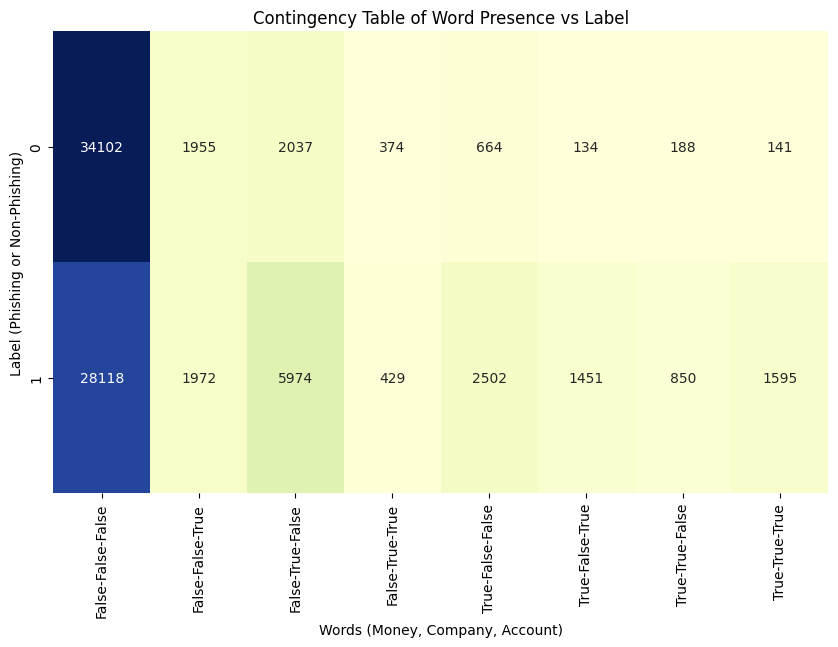

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table
contingency_table = pd.crosstab(df_phishing_email['label'], [df_phishing_email['text_combined'].str.contains('money'),df_phishing_email['text_combined'].str.contains('company'),df_phishing_email['text_combined'].str.contains('account')])
print(contingency_table)
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", cbar=False)
plt.xlabel('Words (Money, Company, Account)')
plt.ylabel('Label (Phishing or Non-Phishing)')
plt.title('Contingency Table of Word Presence vs Label')
plt.show()

# Chi-Square

The chi-square statistic $(χ2)$ is calculated using the formula:
$$\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$$

In order to speed up the process, we are going to use the chi2_contingency function from scipy.stats. This function is used to perform the chi-square test of independence on a contingency table. This test helps to determine whether there is a significant association between two categorical variables.

* $χ^2$: This is the chi-square test statistic. It quantifies the difference between observed and expected frequencies.

* $∑$: This symbol denotes summation. It means that you sum over all the cells in the contingency table (or categories in a single variable scenario).

* $O_{ij}$​: These are the observed frequencies. They represent the actual data counts in each cell of the contingency table or the observed counts in each category.

* $E_{ij}$: These are the expected frequencies. They represent the counts you would expect if the null hypothesis were true. In the context of a contingency table, the expected frequency for each cell is calculated based on the marginal totals and the total sample size, under the assumption of independence between variables.

In [ ]:
from scipy.stats import chi2_contingency

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-square Test:")
print("Chi-square value:", round(chi2))
print("p-value:", round(p))


Chi-square Test:
Chi-square value: 6194
p-value: 0


As **Chi-square** value indicates the extent of the difference between the observed frequencies (how often events actually occurred) and the expected frequencies (how often they would occur if there were no association between the variables).

A higher **Chi-square**value reflects a larger discrepancy between the observed data and what would be expected under the null hypothesis of independence.

A **Chi-square** value of 6194 indicates a substantial difference between the observed and expected frequencies in the contingency table.

In practical terms, such a high **Chi-square** value implies that the variables being analyzed (money,company,account and Phishing and Non-Phishing) are strongly related and this relationship is significant and unlikely to have occurred by random chance alone.

 The **p-value** is a measure used in statistical hypothesis testing to determine the probability of obtaining results as extreme as the observed results of a statistical test, assuming that the null hypothesis is true.

 With a **p-value** of 0, the likelihood of observing such a high chi-square statistic purely by chance is exceedingly low.

 In this case, the **p-value** is not only well below 0.05 but is effectively zero, providing compelling evidence that the association between the presence of specific words ("money," "company," and "account") and the classification of emails as phishing or non-phishing is highly significant.




 # Point Biserial Correlation

The **Point Biserial Correlation** is a statistical measure used to determine the strength and direction of the association between a binary variable and a continuous or ordinal variable

$$r_{pb} = \frac{M_1 - M_0}{s} \sqrt{\frac{n_1 n_0}{n^2}}$$


where:
*  $M_{1}$  is mean of the continuous variable for the group where the binary variable is 1.
*  $M_{0}$  is mean of the continuous variable for the group where the binary variable is 0.

*  $s$ is Standard deviation of the continuous variable.

*  $n_1$  is the number of observations where the binary variable is 1.

*  $n_0$  is the number of observations where the binary variable is 0.

* $n$  is the total number of observations



1. A positive $r_{pb}$  indicates that the continuous variable tends to increase as the binary variable switches from 0 to 1.

2. A negative $r_{pb}$ indicates that the continuous variable tends to decrease as the binary variable switches from 0 to 1.

3. The magnitude of  $r_{pb}$  indicates the strength of the association, with values closer to ±1 indicating a stronger relationship.

4. The p-value associated with  $r_{pb}$ tests the null hypothesis that there is no association between the binary and continuous variables.

5. A low p-value (typically < 0.05) suggests that the observed correlation is statistically significant.

In [ ]:
from scipy.stats import pointbiserialr

# Calculate point biserial correlation for 'money', 'company', and 'account'
correlation_money, p_money = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('money').astype(int))
print("Point Biserial Correlation for money:")
print("Correlation:", correlation_money)
print("p-value:", p_money)

correlation_company, p_company = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('company').astype(int))
print("Point Biserial Correlation for company:")
print("Correlation:", correlation_company)
print("p-value:", p_company)

correlation_account, p_account = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('account').astype(int))
print("Point Biserial Correlation for account:")
print("Correlation:", correlation_account)
print("p-value:", p_account)

Point Biserial Correlation for money:
Correlation: 0.20944011197640156
p-value: 0.0
Point Biserial Correlation for company:
Correlation: 0.19710011307837114
p-value: 0.0
Point Biserial Correlation for account:
Correlation: 0.1030759324568759
p-value: 1.294341522228279e-193


These correlation coefficients indicate the strength and direction of the relationship between each binary variable (phishing or non-phishing email) and the continuous variable (presence of the word in the email text).

Based on these results:
* 'money' and 'company': The presence of these words in email content is moderately positively correlated with the email being classified as phishing. This suggests that emails containing these terms are more likely to be phishing attempts.

* 'account': While still positively correlated with phishing emails, the correlation is weaker compared to 'money' and 'company'. However, the correlation is statistically significant given the very low p-value.

Lets try with the rest of the 10 common words  in phishing emails

In [ ]:
correlation_2008, p_2008 = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('2008').astype(int))
print("Point Biserial Correlation for 2008:")
print("Correlation:", round(correlation_2008, 2))
print("p-value:", p_2008)

correlation_1, p_1 = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('1').astype(int))
print("Point Biserial Correlation for 1:")
print("Correlation:", round(correlation_company, 2))
print("p-value:", p_1)

correlation_10, p_10 = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('10').astype(int))
print("Point Biserial Correlation for 10 :")
print("Correlation:", round(correlation_10, 2))
print("p-value:", p_10)

correlation_3, p_3 = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('3').astype(int))
print("Point Biserial Correlation for 3:")
print("Correlation:", round(correlation_3, 2))
print("p-value:", p_3)

correlation_2, p_2 = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('2').astype(int))
print("Point Biserial Correlation for 2 :")
print("Correlation:", round(correlation_2, 2))
print("p-value:", p_2)

correlation_aug, p_aug = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('aug').astype(int))
print("Point Biserial Correlation for aug :")
print("Correlation:", round(correlation_aug, 2))
print("p-value:", p_aug)

correlation_email, p_email = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('email').astype(int))
print("Point Biserial Correlation for email :")
print("Correlation:", round(correlation_email, 2))
print("p-value:", p_email)

correlation_money, p_money = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('money').astype(int))
print("Point Biserial Correlation for money:")
print("Correlation:", round(correlation_money, 2))
print("p-value:", p_money)

correlation_company, p_company = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('company').astype(int))
print("Point Biserial Correlation for company:")
print("Correlation:", round(correlation_company, 2))
print("p-value:", p_company)

correlation_account, p_account = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('account').astype(int))
print("Point Biserial Correlation for account:")
print("Correlation:", round(correlation_account, 2))
print("p-value:", p_account)





Point Biserial Correlation for 2008:
Correlation: 0.07
p-value: 1.0301473083205657e-86
Point Biserial Correlation for 1:
Correlation: 0.2
p-value: 1.5953022353239094e-274
Point Biserial Correlation for 10 :
Correlation: -0.1
p-value: 1.1930785209652043e-199
Point Biserial Correlation for 3:
Correlation: -0.1
p-value: 1.018975803094231e-177
Point Biserial Correlation for 2 :
Correlation: -0.1
p-value: 6.890212433255773e-166
Point Biserial Correlation for aug :
Correlation: 0.03
p-value: 2.726169048935461e-20
Point Biserial Correlation for email :
Correlation: 0.07
p-value: 1.6719285683828773e-78
Point Biserial Correlation for money:
Correlation: 0.21
p-value: 0.0
Point Biserial Correlation for company:
Correlation: 0.2
p-value: 0.0
Point Biserial Correlation for account:
Correlation: 0.1
p-value: 1.294341522228279e-193


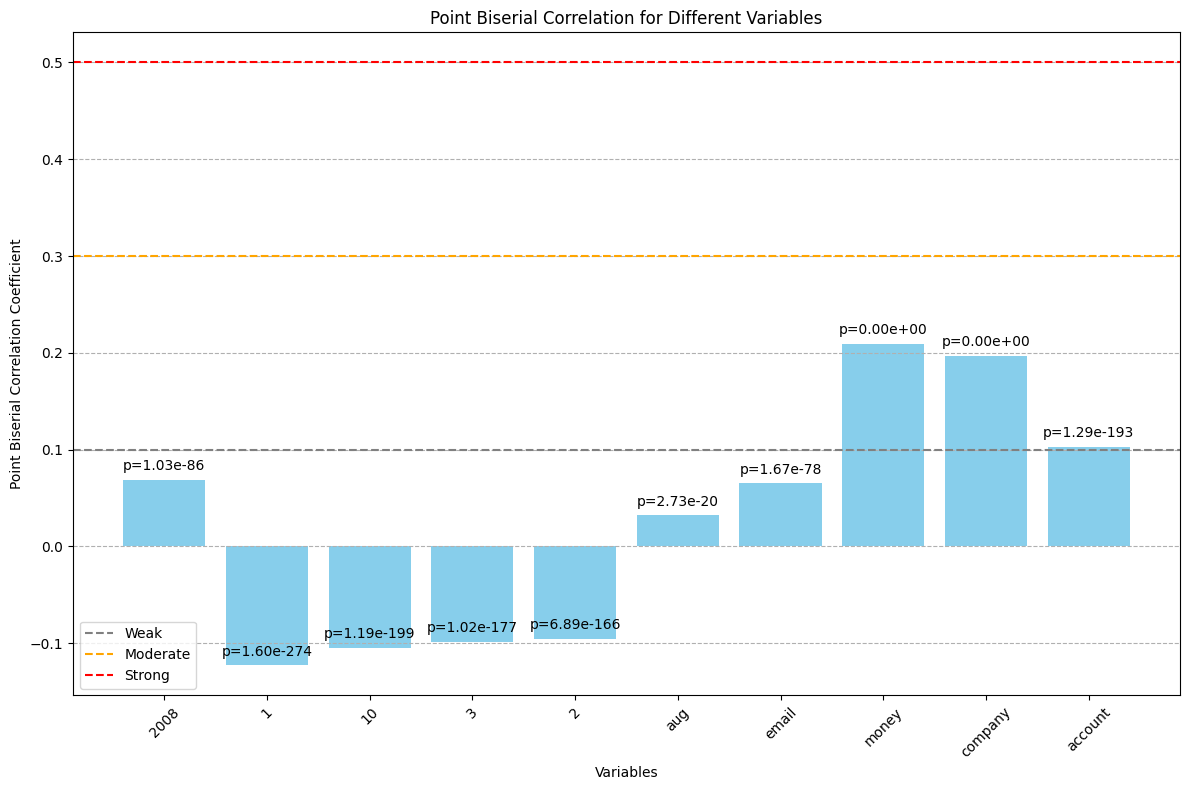

In [ ]:

# Assuming you have already calculated these variables
correlation_2008, p_2008 = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('2008').astype(int))
correlation_1, p_1 = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('1').astype(int))
correlation_10, p_10 = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('10').astype(int))
correlation_3, p_3 = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('3').astype(int))
correlation_2, p_2 = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('2').astype(int))
correlation_aug, p_aug = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('aug').astype(int))
correlation_email, p_email = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('email').astype(int))
correlation_money, p_money = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('money').astype(int))
correlation_company, p_company = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('company').astype(int))
correlation_account, p_account = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('account').astype(int))


# Define the variables and their respective correlation coefficients and p-values
variables1 = ['2008', '1', '10', '3', '2', 'aug', 'email', 'money', 'company', 'account']
correlations1 = [correlation_2008, correlation_1, correlation_10, correlation_3, correlation_2,
                correlation_aug, correlation_email, correlation_money, correlation_company, correlation_account]
p_values = [p_2008, p_1, p_10, p_3, p_2, p_aug, p_email, p_money, p_company, p_account]


# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(variables1, correlations1, color='skyblue')

# Adding p-values as annotations on top of each bar
for bar, p_value in zip(bars, p_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'p={p_value:.2e}', ha='center', color='black')

# Horizontal lines for correlation strength interpretation
plt.axhline(y=0.1, color='gray', linestyle='--', label='Weak')
plt.axhline(y=0.3, color='orange', linestyle='--', label='Moderate')
plt.axhline(y=0.5, color='red', linestyle='--', label='Strong')

# Customize plot labels and title
plt.xlabel('Variables')
plt.ylabel('Point Biserial Correlation Coefficient')
plt.title('Point Biserial Correlation for Different Variables')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()




Let's calculate for all the 10 most common words for Non-Phishing emails

In [ ]:
correlation_enron, p_enron = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('enron').astype(int))
print("Point Biserial Correlation for enron:")
print("Correlation:", round(correlation_enron, 2))
print("p-value:", p_enron)

correlation_ect, p_ect = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('ect').astype(int))
print("Point Biserial Correlation for ect:")
print("Correlation:", round(correlation_ect, 2))
print("p-value:", p_ect)

correlation_1, p_1 = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('1').astype(int))
print("Point Biserial Correlation for 1 :")
print("Correlation:", round(correlation_1, 2))
print("p-value:", p_1)

correlation_2008, p_2008 = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('2008').astype(int))
print("Point Biserial Correlation for 2008:")
print("Correlation:", round(correlation_2008, 2))
print("p-value:", p_2008)

correlation_submissionid, p_submissionid = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('submissionid').astype(int))
print("Point Biserial Correlation for submissionid :")
print("Correlation:", round(correlation_submissionid, 2))
print("p-value:", p_submissionid)

correlation_new, p_new = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('new').astype(int))
print("Point Biserial Correlation for new :")
print("Correlation:", round(correlation_new, 2))
print("p-value:", p_new)

correlation_0, p_0 = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('0').astype(int))
print("Point Biserial Correlation for 0 :")
print("Correlation:", round(correlation_0, 2))
print("p-value:", p_0)

correlation_submission, p_submission = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('submission').astype(int))
print("Point Biserial Correlation for submission:")
print("Correlation:", round(correlation_submission, 2))
print("p-value:", p_submission)

correlation_2, p_2 = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('2').astype(int))
print("Point Biserial Correlation for 2 :")
print("Correlation:", round(correlation_2, 2))
print("p-value:", p_2)

correlation_added, p_added = pointbiserialr(df_phishing_email['label'], df_phishing_email['text_combined'].str.lower().str.contains('added').astype(int))
print("Point Biserial Correlation for added :")
print("Correlation:", round(correlation_2, 2))
print("p-value:", p_added)


Point Biserial Correlation for enron:
Correlation: -0.32
p-value: 0.0
Point Biserial Correlation for ect:
Correlation: -0.24
p-value: 0.0
Point Biserial Correlation for 1 :
Correlation: -0.12
p-value: 1.5953022353239094e-274
Point Biserial Correlation for 2008:
Correlation: 0.07
p-value: 1.0301473083205657e-86
Point Biserial Correlation for submissionid :
Correlation: -0.03
p-value: 3.784756349589068e-15
Point Biserial Correlation for new :
Correlation: -0.01
p-value: 1.967596816920405e-05
Point Biserial Correlation for 0 :
Correlation: -0.05
p-value: 4.1801371979939254e-41
Point Biserial Correlation for submission:
Correlation: -0.15
p-value: 0.0
Point Biserial Correlation for 2 :
Correlation: -0.1
p-value: 6.890212433255773e-166
Point Biserial Correlation for added :
Correlation: -0.1
p-value: 9.494996754239724e-248


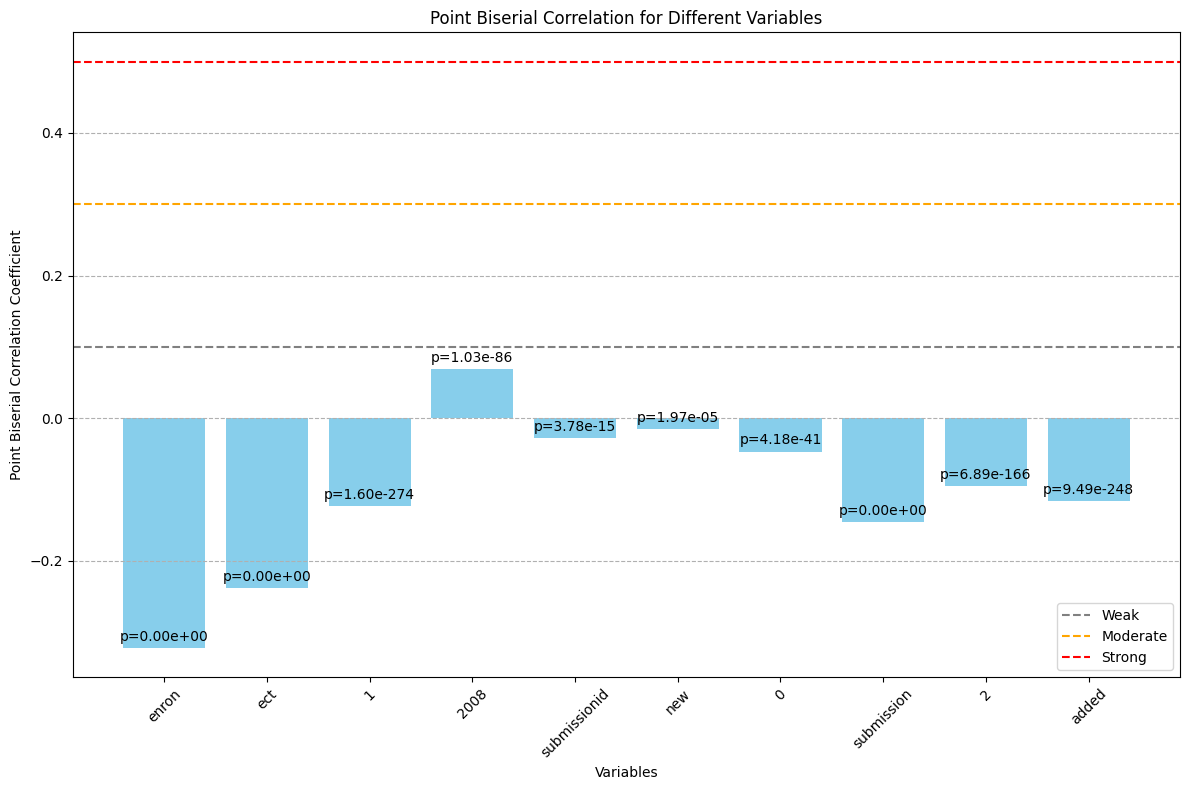

In [ ]:

# Define the variables and their respective correlation coefficients and p-values
variables2 = ['enron', 'ect', '1', '2008', 'submissionid', 'new', '0', 'submission', '2', 'added']
correlations2 = [correlation_enron, correlation_ect, correlation_1, correlation_2008, correlation_submissionid,
                correlation_new, correlation_0, correlation_submission, correlation_2, correlation_added]
p_values = [p_enron, p_ect, p_1, p_2008, p_submissionid, p_new, p_0, p_submission, p_2, p_added]


# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(variables2, correlations2, color='skyblue')

# Adding p-values as annotations on top of each bar
for bar, p_value in zip(bars, p_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'p={p_value:.2e}', ha='center', color='black')

# Horizontal lines for correlation strength interpretation
plt.axhline(y=0.1, color='gray', linestyle='--', label='Weak')
plt.axhline(y=0.3, color='orange', linestyle='--', label='Moderate')
plt.axhline(y=0.5, color='red', linestyle='--', label='Strong')

# Customize plot labels and title
plt.xlabel('Variables')
plt.ylabel('Point Biserial Correlation Coefficient')
plt.title('Point Biserial Correlation for Different Variables')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()



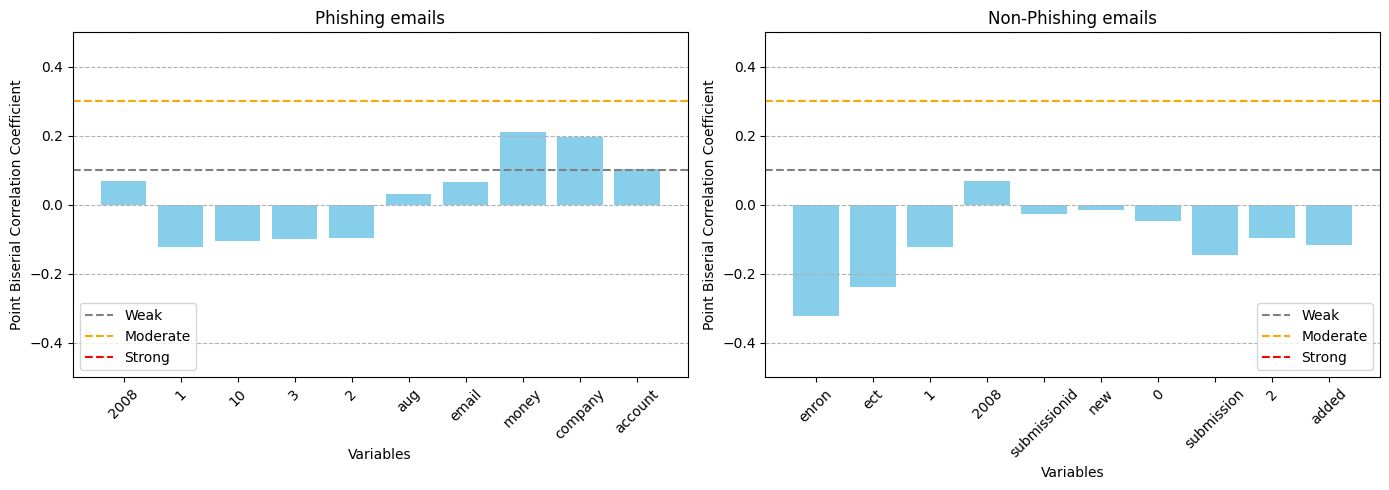

In [ ]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# First subplot
axes[0].bar(variables1, correlations1, color='skyblue')
axes[0].axhline(y=0.1, color='gray', linestyle='--', label='Weak')
axes[0].axhline(y=0.3, color='orange', linestyle='--', label='Moderate')
axes[0].axhline(y=0.5, color='red', linestyle='--', label='Strong')
axes[0].set_xlabel('Variables')
axes[0].set_ylabel('Point Biserial Correlation Coefficient')
axes[0].set_title('Phishing emails')
axes[0].set_xticks(range(len(variables1)))
axes[0].set_xticklabels(variables1, rotation=45)
axes[0].grid(axis='y', linestyle='--')
axes[0].legend()
axes[0].set_ylim(-0.5, 0.5)  # Set y-axis limits for the first subplot

# Second subplot
axes[1].bar(variables2, correlations2, color='skyblue')
axes[1].axhline(y=0.1, color='gray', linestyle='--', label='Weak')
axes[1].axhline(y=0.3, color='orange', linestyle='--', label='Moderate')
axes[1].axhline(y=0.5, color='red', linestyle='--', label='Strong')
axes[1].set_xlabel('Variables')
axes[1].set_ylabel('Point Biserial Correlation Coefficient')
axes[1].set_title('Non-Phishing emails')
axes[1].set_xticks(range(len(variables2)))
axes[1].set_xticklabels(variables2, rotation=45)
axes[1].grid(axis='y', linestyle='--')
axes[1].legend()
axes[1].set_ylim(-0.5, 0.5)  # Set y-axis limits for the first subplot

plt.tight_layout()
plt.show()

The point-biserial correlation analysis reveals statistically significant relationships between various variables and the binary outcome, though most correlations are weak. Notably, "money" (r = 0.21) and "company" (r = 0.2) exhibit moderate positive correlations, indicating a meaningful association with the outcome. Conversely, "enron" (r = -0.32) and "ect" (r = -0.24) show stronger negative correlations, suggesting these variables may inversely impact the outcome

While several variables show statistically significant relationships with the binary outcome, their practical significance varies. Variables with stronger correlations (positive or negative) such as money, company, enron, and ect are more likely to play crucial roles in distinguishing phishing from non-phishing emails. Conversely, variables with weaker correlations may have less impact in practical applications despite their statistical significance. Therefore, focusing on these key variables can enhance the accuracy and effectiveness of phishing email detection systems

# Lenghts

Analyzing mean, median, and standard deviation of email lengths for phishing and non-phishing emails offers specific insights into email behavior.

* The mean length indicates the average size, helping identify anomalies like unusually long phishing emails or concise, suspicious messages.

* Median length provides the middle value, useful when extreme values (outliers) exist, often seen in phishing attempts using either very short or lengthy texts.

* Standard deviation quantifies the dispersion from the mean, highlighting variability in email lengths.


In [ ]:

non_phishing_emails = df_phishing_email[df_phishing_email['label'] == 0]
phishing_emails =  df_phishing_email[df_phishing_email['label'] == 1]

# Descriptive statistics for non-phishing email lengths
non_phishing_email_lengths = non_phishing_emails['text_combined'].apply(len)
print("Mean email length (Non-Phishing):", round(non_phishing_email_lengths.mean()))
print("Median email length (Non-Phishing):", round(non_phishing_email_lengths.median()))
print("Standard deviation of email length (Non-Phishing):", round(non_phishing_email_lengths.std()))

# Descriptive statistics for phishing email lengths
phishing_email_lengths = phishing_emails['text_combined'].apply(len)
print("Mean email length (Phishing):", round(phishing_email_lengths.mean()))
print("Median email length (Phishing):", round(phishing_email_lengths.median()))
print("Standard deviation of email length (Phishing):", round(phishing_email_lengths.std()))

Mean email length (Non-Phishing): 1536
Median email length (Non-Phishing): 779
Standard deviation of email length (Non-Phishing): 3696
Mean email length (Phishing): 1060
Median email length (Phishing): 391
Standard deviation of email length (Phishing): 21193


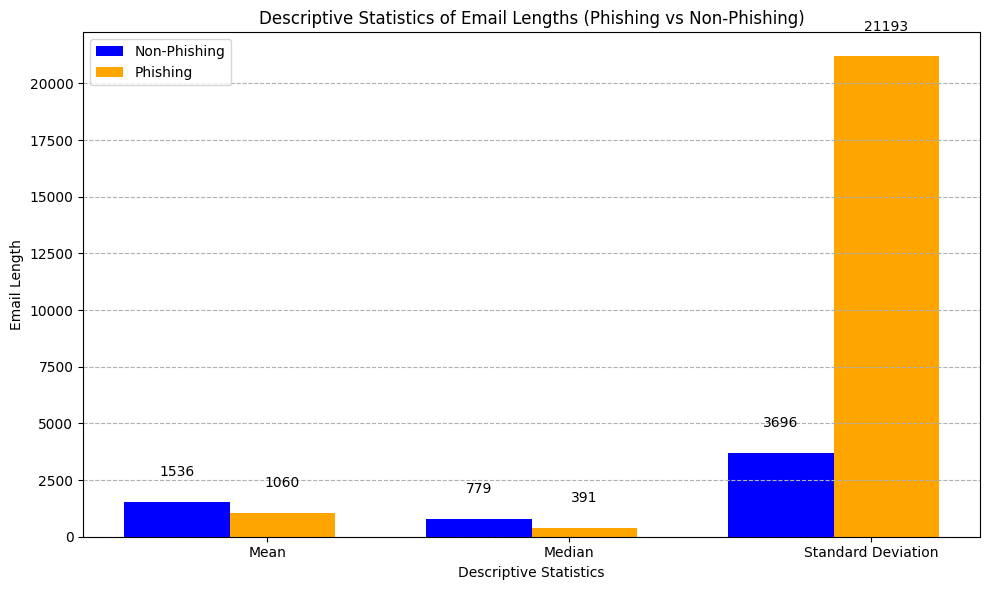

In [ ]:
import matplotlib.pyplot as plt

# Data for non-phishing emails
mean_non_phishing = 1536
median_non_phishing = 779
std_non_phishing = 3696

# Data for phishing emails
mean_phishing = 1060
median_phishing = 391
std_phishing = 21193

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions and width
bar_width = 0.35
index = ['Mean', 'Median', 'Standard Deviation']
bar_positions_non_phishing = [0.2, 1.2, 2.2]
bar_positions_phishing = [0.2 + bar_width, 1.2 + bar_width, 2.2 + bar_width]

# Bar plots for non-phishing and phishing emails
bars_non_phishing = ax.bar(bar_positions_non_phishing, [mean_non_phishing, median_non_phishing, std_non_phishing], bar_width, label='Non-Phishing', color='blue')
bars_phishing = ax.bar(bar_positions_phishing, [mean_phishing, median_phishing, std_phishing], bar_width, label='Phishing', color='orange')

# Add labels, title, and grid
ax.set_xlabel('Descriptive Statistics')
ax.set_ylabel('Email Length')
ax.set_title('Descriptive Statistics of Email Lengths (Phishing vs Non-Phishing)')
ax.set_xticks([0.5, 1.5, 2.5])
ax.set_xticklabels(index)
ax.grid(axis='y', linestyle='--')

# Add values as text above bars
def add_values(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 1000, round(yval, 2), ha='center', va='bottom', fontsize=10)

add_values(bars_non_phishing)
add_values(bars_phishing)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()


What conclusion can we draw for the result above?

*   Non-phishing emails tend to be longer on average than phishing emails.
*   While there are longer non-phishing emails, even the shorter ones are longer than those typically found in phishing emails

* Both categories show considerable variability in email lengths, but phishing emails exhibit a much higher standard deviation (21193 characters) compared to non-phishing emails (3696 characters). This large deviation suggests that phishing emails can vary greatly in length, potentially indicating different strategies or styles employed by attackers.


# Paragraphs

Paragraph analysis complements other textual analyses (like sentiment analysis or length analysis) by focusing on the structural and organizational aspects of emails

In [ ]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
pip install --upgrade nltk

In [ ]:
from nltk.tokenize import word_tokenize

# Tokenize email text into paragraphs
def tokenize_paragraphs(text):
    return [para for para in text.split('\n') if para.strip()]

df_phishing_email['paragraphs'] = df_phishing_email['text_combined'].apply(tokenize_paragraphs)

# Calculate paragraph lengths
df_phishing_email['paragraph_lengths'] = df_phishing_email['paragraphs'].apply(lambda paras: [len(word_tokenize(para)) for para in paras])

# Separate phishing and non-phishing emails
phishing_emails = df_phishing_email[df_phishing_email['label'] == 1]
non_phishing_emails = df_phishing_email[df_phishing_email['label'] == 0]

# Calculate statistics for paragraph lengths
phishing_lengths = [length for sublist in phishing_emails['paragraph_lengths'] for length in sublist]
non_phishing_lengths = [length for sublist in non_phishing_emails['paragraph_lengths'] for length in sublist]

phishing_mean = pd.Series(phishing_lengths).mean()
phishing_median = pd.Series(phishing_lengths).median()
phishing_std = pd.Series(phishing_lengths).std()

non_phishing_mean = pd.Series(non_phishing_lengths).mean()
non_phishing_median = pd.Series(non_phishing_lengths).median()
non_phishing_std = pd.Series(non_phishing_lengths).std()


In [ ]:
# Display results
print(f"Mean paragraph length for phishing emails: {phishing_mean:.2f}")
print(f"Median paragraph length for phishing emails: {phishing_median:.2f}")
print(f"Standard deviation of paragraph length for phishing emails: {phishing_std:.2f}")
print(f"Mean paragraph length for non-phishing emails: {non_phishing_mean:.2f}")
print(f"Median paragraph length for non-phishing emails: {non_phishing_median:.2f}")
print(f"Standard deviation of paragraph length for non-phishing emails: {non_phishing_std:.2f}")

Mean paragraph length for phishing emails: 121.35
Median paragraph length for phishing emails: 55.00
Standard deviation of paragraph length for phishing emails: 594.46
Mean paragraph length for non-phishing emails: 203.18
Median paragraph length for non-phishing emails: 106.00
Standard deviation of paragraph length for non-phishing emails: 479.18


As evident from the results above, the lower mean and median values in phishing emails suggest a preference for shorter and more concise yet impactful messages.

This strategy prioritizes urgency, fear, or simplicity to prompt recipients to act swiftly


Non-phishing emails often exhibit longer and more consistent content structure, reflecting genuine communication styles. In contrast, phishing emails may use shorter paragraphs or irregular structures to deliver malicious content.


# Sentiment Analysis



Sentiment analysis can be surprisingly insightful in analyzing phishing and non-phishing emails despite its primary use in gauging emotional tone

Phishing emails often use tactics like urgency, positivity or fear  to deceive recipients.

We can explore whether phishing emails tend to exhibit a more negative,positive or neutral  sentiment overall

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize


* Positive Sentiment: Sentiment scores greater than 0 indicate a positive
sentiment. The closer the score is to +1, the stronger the positive sentiment.

* Neutral Sentiment: A score of 0 suggests a neutral sentiment, meaning that the text does not express a positive or negative sentiment. It’s essentially neutral or indifferent.

* Negative Sentiment: Scores less than 0 indicate a negative sentiment. The closer the score is to -1, the stronger the negative sentiment.

In [ ]:
from textblob import TextBlob


#Function to perform sentiment analysis using TextBlob and return sentiment score
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Calculate mean sentiment score for phishing and non-phishing emails
mean_sentiment_non_phishing = non_phishing_emails['text_combined'].apply(analyze_sentiment).mean()
mean_sentiment_phishing = phishing_emails['text_combined'].apply(analyze_sentiment).mean()

# Display results
print(f"Mean sentiment score for non-phishing emails: {mean_sentiment_non_phishing:.4f}")
print(f"Mean sentiment score for phishing emails: {mean_sentiment_phishing:.4f}")

Mean sentiment score for non-phishing emails: 0.0965
Mean sentiment score for phishing emails: 0.1933


As we can see from the result above, non-phishing emails might contain more neutral(0.0965), typical of legitimate communication.

While the score  for phishing emails(0.1933) is suggesting a more positive sentiment or potentially more emotionally charged language.

This insight aligns with the strategy of phishing attackers who often use emotionally manipulative language to evoke quick responses or actions from recipients.

# Topic Modeling

Topic modeling is a statistical technique used to discover abstract topics within a collection of documents



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming df_phishing_email['text_combined'] contains the preprocessed email text
# Separate phishing and non-phishing emails
phishing_emails = df_phishing_email[df_phishing_email['label'] == 1]
non_phishing_emails = df_phishing_email[df_phishing_email['label'] == 0]

# Vectorize the text data for phishing emails
vectorizer_phishing = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm_phishing = vectorizer_phishing.fit_transform(phishing_emails['text_combined'])

# Apply LDA for phishing emails
num_topics_phishing = 5  # Adjust the number of topics based on your data
lda_model_phishing = LatentDirichletAllocation(n_components=num_topics_phishing, random_state=42)
lda_model_phishing.fit(dtm_phishing)

# Vectorize the text data for non-phishing emails
vectorizer_non_phishing = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm_non_phishing = vectorizer_non_phishing.fit_transform(non_phishing_emails['text_combined'])

# Apply LDA for non-phishing emails
num_topics_non_phishing = 5  # Adjust the number of topics based on your data
lda_model_non_phishing = LatentDirichletAllocation(n_components=num_topics_non_phishing, random_state=42)
lda_model_non_phishing.fit(dtm_non_phishing)


LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Function to print top words for each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f" {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
        print()

In [ ]:
# Print top words for phishing emails
print("Topics  for Phishing Emails:")
num_top_words = 15
feature_names_phishing = vectorizer_phishing.get_feature_names_out()
display_topics(lda_model_phishing, feature_names_phishing, num_top_words)
print()

Topics  for Phishing Emails:
 1:
2008, aug, 10, wed, 06, cnn, alert, cnncom, news, custom, alerts, thu, 07, fri, cable

 2:
10, news, daily, cnncom, 2008, suspect, adobe, 00, aug, cable, return, police, attack, network, going

 3:
10, company, replica, watches, statements, news, 2008, daily, aug, cnncom, information, oil, securities, report, investment

 4:
account, money, bank, email, business, transaction, contact, security, country, fund, information, mr, million, company, transfer

 5:
email, com, http, free, 20, click, new, order, time, online, make, business, people, www, information




* Topic 1: This list includes dates, days of the week, media references (CNN), and generic terms like "alert" and "news". Phishing emails might use dates to create urgency or credibility (e.g., "Breaking news on CNN"). Media references and terms like "alert" can make the email appear urgent and trustworthy.

* Topic 2: This list includes more specific terms like "suspect", "adobe", "police", "attack", and network-related terms. Phishing emails may use these terms to create a sense of urgency or to impersonate legitimate organizations (e.g., "Adobe Security Alert", "Police Investigation"

* Topic 3: This list includes terms related to finance ("securities", "investment"), news, and specific products ("replica watches"). Phishing emails might promise investment opportunities, financial news updates, or offers related to luxury items like watches to lure recipients.

* Topic 4: This list includes terms related to banking and finance ("bank", "account", "transaction", "transfer", "fund"), as well as generic business terms. Phishing emails often impersonate banks or financial institutions and ask recipients to verify account details or transfer funds.

* Topic 5: This list includes common internet-related terms like "email", "http", "click", "www", "online", and generic terms like "free", "new", "order". Phishing emails often include links (http), urge recipients to click, offer free items or new opportunities, and request personal information.

In [ ]:
# Print top words for non-phishing emails
print("Top words for Non-Phishing Emails:")
num_top_words = 15
feature_names_non_phishing = vectorizer_non_phishing.get_feature_names_out()
display_topics(lda_model_non_phishing, feature_names_non_phishing, num_top_words)
print()

Top words for Non-Phishing Emails:
 1:
ect, submissionid, enron, added, sender, notes, submission, virus, hou, total, subject, 2000, cc, pm, vince

 2:
power, new, 2002, time, story, use, mail, people, posted, like, state, discuss, said, links, capacity

 3:
university, papers, language, conference, workshop, research, information, systems, email, paper, learning, 2007, usa, data, new

 4:
enron, company, said, new, 2001, energy, business, com, 11, trading, time, year, power, 10, dynegy

 5:
2008, aug, list, wrote, use, email, message, like, new, wed, mailing, im, dont, file, using




* Topic 1: Terms related to internal communication and operations within a company (e.g., "enron", "submission", "sender", "subject"). It also includes technical terms like "virus", and specific identifiers or codes ("submissionid", "cc"). These terms are typical of emails exchanged within a company's internal systems and are less likely to appear in phishing emails aimed at external users.potentially indicating noise or less structured content.

* Topic 2: This list includes general terms related to news, discussions, and information sharing (e.g., "new", "time", "story", "people"). It also includes terms related to communication and information dissemination ("mail", "links"). These terms are commonly found in emails discussing business updates, industry news, or general communications among colleagues.


* Topic 3: This list includes terms related to academia, research, and professional development (e.g., "university", "papers", "conference", "research"). It also includes technical terms related to information systems and data ("information", "systems", "data"). These terms are commonly found in emails related to academic collaborations, conference announcements, or research updates.

* Topic 4: Terms related to energy trading and business operations (e.g., "enron", "company", "energy", "business", "trading"). It also includes references to specific companies ("dynegy") and dates ("2001", "11", "10"). These terms are typical of emails related to business updates, industry developments, or financial transactions within the energy sector.


* Topic 5: This list includes general terms related to communication and scheduling (e.g., "email", "message", "mailing", "im", "file"). It also includes terms related to time and dates ("2008", "aug", "wed"). These terms are commonly found in emails discussing meetings, project updates, or general communications within a company or organization



 Common Themes in Phishing Emails:
* Urgency and Fear: Using urgent language or fear-inducing threats to prompt immediate action.

* Trustworthiness: Impersonating well-known organizations or using official-sounding language to gain trust.

* Personal Information Requests: Asking for sensitive information like passwords, account details, or personal identifiers.

* Offers and Deals: Promising free items, discounts, or exclusive offers to lure recipients. Common Themes in Non-Phishing Emails:

---

 Common Themes in Non-Phishing Emails:

* Internal Operations: Terms related to company-specific operations, internal communications, and technical details.

* Industry and Sector-specific Language: Terms related to specific industries (e.g., energy, academia) and business sectors.

* Professional and Technical Jargon: Terms related to research, conferences, technical systems, and business processes.
